In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

In [ ]:
def eta(x,a):
  return 1/(1+np.exp(a*x))

zeta = 0.5  # f_X /sim U(-1,1)

# implementation of proposition 1
# return a classifier with t
def h_bar(t):
  m11, m00 = np.cos(t), np.sin(t)
  def hb(x):
    if m11+m00 >= 0:
      return int(eta(x)>=m00/(m11+m00))
    else:
      return int(eta(x)<=m00/(m11+m00))
  return hb

# confusion matrix, analytical solution
def C11(t, a):  # P(Y=1, h=1)
  m11,m00 = np.cos(t), np.sin(t)
  x_prime = 0.
  h = h_bar(t)
  if m00 == 0:
    x_prime = 1
  elif (m00+m11)/m00-1 <= 0:
    x_prime = -1
  else:
    x_prime = np.log(m11/m00)/a
    if x_prime > 1:
      x_prime = 1
    elif x_prime < -1:
      x_prime = -1
  if m00+m11 >= 0:
    return 0.5*(x_prime-1/a*np.log(1+np.exp(a*x_prime))+1+1/a*np.log(1+np.exp(-a))) # x-1/aln(1+e^ax)
  else:
    return 0.5*(1-1/a*np.log(1+np.exp(a))-x_prime+1/a*np.log(1+np.exp(a*x_prime)))

def C10(t, a):  # P(Y=0, h=1)
  return 0.5-C11(t, a)

def C01(t, a):  # P(Y=1, h=0)
  return 0.5-C00(t, a)

def C00(t, a):  # P(Y=0, h=0)
  m11,m00 = np.cos(t), np.sin(t)
  x_prime = 0
  h = h_bar(t)
  if m00 == 0:
    x_prime = 1
  elif (m00+m11)/m00-1 <= 0:
    x_prime = -1
  else:
    x_prime = np.log(m11/m00)/a
    if x_prime > 1:
      x_prime = 1
    elif x_prime < -1:
      x_prime = -1
  if m00+m11 >= 0:
    return 0.5*(1/a*np.log(1+np.exp(a))-1/a*np.log(1+np.exp(a*x_prime)))  # ln(1+e^ax)
  else:
    return 0.5*(1/a*np.log(1+np.exp(a*x_prime))-1/a*np.log(1+np.exp(-a)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


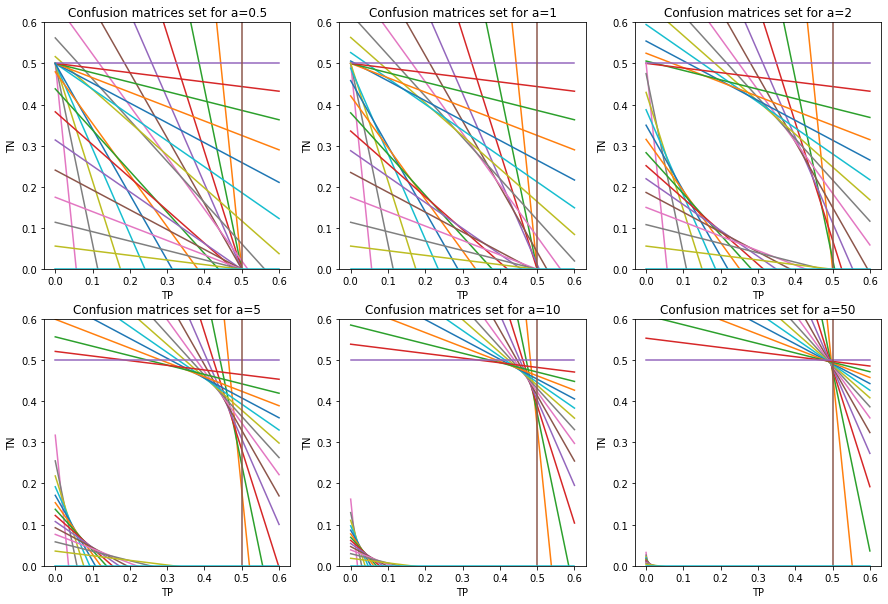

In [ ]:
import functools

ts = np.append(np.linspace(0,np.pi/2,15),(np.linspace(np.pi,np.pi*1.5,15)))
M11s = np.cos(ts)
M00s = np.sin(ts)
Tp = np.linspace(0, 0.6, 100)

fig, ax = plt.subplots(2,3, figsize=(15,10))

for id,a in enumerate([0.5, 1, 2, 5, 10, 50]):
  
  TPs = list(map(functools.partial(C11, a=a), ts))
  TNs = list(map(functools.partial(C00, a=a), ts))
  ls = np.multiply(M11s,TPs)+np.multiply(M00s,TNs)
  for i,l in enumerate(ls):
    ax[id//3,id%3].plot(Tp, (l-Tp*M11s[i])/M00s[i])

  ax[id//3,id%3].set_ylim(0,0.6)
  ax[id//3,id%3].set_xlabel('TP')
  ax[id//3,id%3].set_ylabel('TN')
  ax[id//3,id%3].set_title('Confusion matrices set for a={}'.format(a))